# Tutorial 3 - Least Squares Estimation with Numpy and matplotlib

Let's look at an example of using NumPy by performing gradient descent on some data. 

In [8]:
# Let's import NumPy as np 
import numpy as np
# Let's import some useful Python OS utilites 
import os
# Let's inline the plotting library in Python
%matplotlib inline
# This import is for the library called matplotlib
import matplotlib 
# This is the abbreviation for the plotting command
import matplotlib.pyplot as plt
# Set the seed so output is consisent across runs
np.random.seed(42)

Let's begin with most simple example for least squares estimation.

In [9]:
# The features (inputs)
X = 2 * np.random.rand(100, 1)

# The labels (outputs to be estimated) y = y_0 + 3*X + noise 
y = 4 + 3 * X + np.random.randn(100, 1)

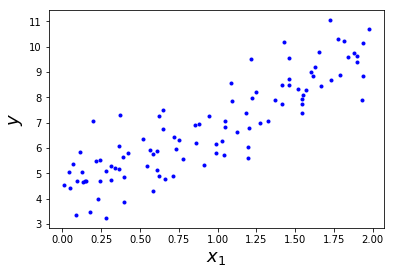

In [10]:
# Let's plot the above data
# The plt.plot function is similar to MatLab plot
# The "b." means to style so data are dots that are blue
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.show()

Assuming that $\mathbf{X}$ has full column rank or linearly independent columns (this implies that $\mathbf{m≥n}$
or we have a skinny $\mathbf{X}$ that's full rank) there is a unique optimal solution. The least-squares solution (predictors), $\hat{\theta}$, can be solved using the normal equations:
$\hat{\theta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.

In [11]:
# Add x0 = 1 or the first feature (constant) is added to each instance
X_b = np.c_[np.ones((100, 1)), X]  
# Let's use Numpy to calculate the best theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.21509616],
       [2.77011339]])

Therefore, our best theta from the normal equations is a NumPy array of shape (2,1) where : 

$\hat{\theta}_1 = 4.21509616$ and $\hat{\theta}_2 = 2.77011339$.

Let's see how our predictors do with a new instance of data
where $\hat{y}=\hat{\theta}^{\intercal}\mathbf{X}^{(i)}$:

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
# et's take the dot product of both vectors 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

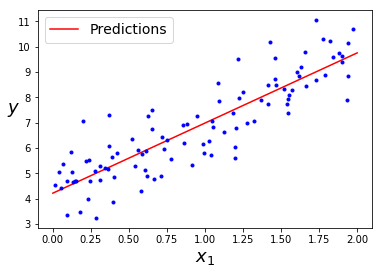

In [14]:
# Let's plot the result of our new predicts versus our truth model
# Here the label is a handle to legend method
plt.plot(X_new, y_predict, "r-", label ="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

A better way to do this is to use gradient descent for large datasets since taking the matrix inverse can be computationally costly. 

We can summarize gradient descent as the following steps:

$\theta \leftarrow \theta - \eta\nabla_{\theta}MSE(\theta)$

where 

$MSE(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{\intercal}\mathbf{X}^{(i)}-y^{(i)})^{2}$.

We are taking the gradient of the Mean Squared Error with respect to the predictors, $\theta$, and can tune the learning rate, $\eta$ . 

Here is a quick implementation of gradient descent using NumPy:

In [15]:
# Learning rate
eta = 0.1
# Number of iterations
n_iterations = 1000
# Number of instances of data (the shape of X is (100,2)
m = 100
# Initialize theta using a normal dist
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    # Calculate the gradients 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.21509616],
       [2.77011339]])

Here we see that we get a predictor that's almost as good as using the normal equations. Let's see how our prediction changes for different learning rates.

In [17]:
# Empty list for bgd predictor path 
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10: 
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            # Append new that to empty list
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

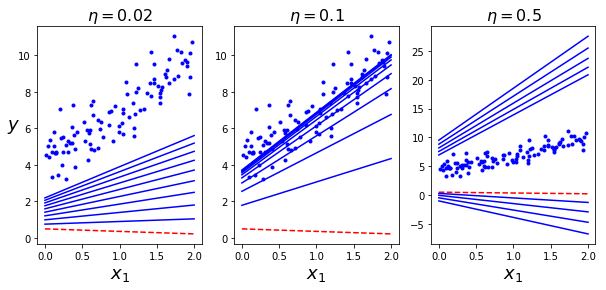

In [18]:
np.random.seed(42)
# random initialization
theta = np.random.randn(2,1)  

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
# ylabel here since we want to label to left of this subplot
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

The first predicition is in red. Here we can see that the learning rate can affect performance of gradient descent. Changing hyperparameters so that we get best performance can  take some experimenting. Learning rate $\eta=0.1$ works the best here.  

Let's now use stochastic gradient descent with a learning schedule for $\eta$. For each epoch we will vary the learning rate according to the schedule to escape local minimum. 

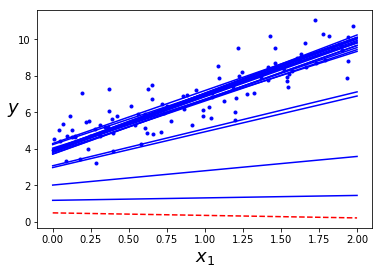

In [19]:
# Set the seed so stable across runs
np.random.seed(42)

# Empty list for theta path using sgd
theta_path_sgd = []

# 50 epochs (or cycles)
n_epochs = 50

# learning rate schedule hyperparameters
t0, t1 = 5, 50 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    # Perform the stoch gradient descent for n epochs
    for i in range(m):
        # Let's look at the first epoch
        # And the first 20 iterations
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            if i > 0:
                style = "b-" 
            else: 
                style= "r--"
            plt.plot(X_new, y_predict, style)        
        # This will give us a random index of the data 0 to 100
        random_index = np.random.randint(m)
        # This will use the random index to get 
        # a random instance of features and labels
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        # Perform gradients on the random instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # Calculate eta according to the learning schedule
        eta = learning_schedule(epoch * m + i)
        # Perform gradient descent m number of times
        theta = theta - eta * gradients
        # Append new theta to theta_path_sgd
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.show()

We can see that using stochastic gradient descent with a learning schedule can greatly improve estimation. Let's look at doing mini-batch gradient descent.

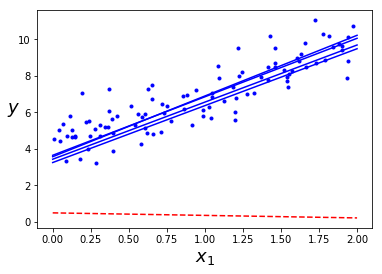

In [20]:
# Set the seed so stable across runs 
np.random.seed(42)

# Empty list for theta path using mbgd
theta_path_mbgd = []

# Hyperparameters
n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2,1)  # random initialization


t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    # This will create an array with indices shuffles
    shuffled_indices = np.random.permutation(m)
    # The row or instances of the features will be shuffled
    X_b_shuffled = X_b[shuffled_indices]
    # The row or instances of the labels will be shuffled
    y_shuffled = y[shuffled_indices]
    # This will be the same as start=0, stop=m, step=minibatch
    # Will return an iterator for 0, 20, 40, 60, 80,...
    for i in range(0, m, minibatch_size):
        # Let's look at the first epoch using mini-batches
        if epoch == 0 and i < 100:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i >0 else "r--" 
            plt.plot(X_new, y_predict, style)       
        t += 1
        # First iter is [0:20] on shuffled X and y
        # Then iter [20:40], then [40:60], etc
        xi = X_b_shuffled[i: i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mbgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.show()

In [21]:
theta

array([[4.25214635],
       [2.7896408 ]])

Let's look at the path that $\theta$ takes using the different learning methods. 

In [22]:
# Convert Python lists to NumPy arrays so we can take slices
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbgd = np.array(theta_path_mbgd)

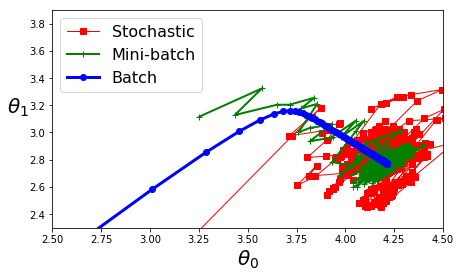

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot the path of thetas (phase-plane)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
plt.tight_layout()

We can see that using mini-batches we get almost the same performance as using stochastic gradient descent but with fewer iterations. In general, the method of using mini-batches will get to a solution that is close to sgd but with fewer iterations. Usually, this is good enough. 